# Display SpineMetsCT Processed Data

This notebook visualizes the processed data in the `processed_data/` directory to help understand the dataset structure and content.

In [10]:
# Import necessary libraries
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from tqdm.notebook import tqdm
import random
from PIL import Image

## 1. Explore Directory Structure

In [11]:
# Set the base directory for processed data
base_dir = "processed_data/"

# Display directory structure
def list_directory_structure(directory, indent=""):
    print(f"{indent}📁 {os.path.basename(directory)}/")
    
    # List directories first, then files
    items = os.listdir(directory)
    directories = [item for item in items if os.path.isdir(os.path.join(directory, item))]
    files = [item for item in items if os.path.isfile(os.path.join(directory, item))]
    
    # Sort for consistent output
    directories.sort()
    files.sort()
    
    # Print directories recursively
    for item in directories:
        full_path = os.path.join(directory, item)
        list_directory_structure(full_path, indent + "  ")
    
    # Print files (limit to 10 if there are many)
    if len(files) > 10:
        for item in files[:5]:
            print(f"{indent}  📄 {item}")
        print(f"{indent}  ... {len(files)-10} more files ...")
        for item in files[-5:]:
            print(f"{indent}  📄 {item}")
    else:
        for item in files:
            print(f"{indent}  📄 {item}")

if os.path.exists(base_dir):
    list_directory_structure(base_dir)
else:
    print(f"Directory '{base_dir}' does not exist.")

📁 /
  📁 SpineMetsCT_npz/
    📁 train/
      📄 13627_05-17-2008-SpineCRANIOSPINALSUPINE Adult-91579_4.000000-SKINTOSKIN1.5mm13627-27649_300.000000-Spine Segmentation-23782_0.npz
      📄 13627_05-17-2008-SpineCRANIOSPINALSUPINE Adult-91579_4.000000-SKINTOSKIN1.5mm13627-27649_300.000000-Spine Segmentation-23782_100.npz
      📄 13627_05-17-2008-SpineCRANIOSPINALSUPINE Adult-91579_4.000000-SKINTOSKIN1.5mm13627-27649_300.000000-Spine Segmentation-23782_104.npz
      📄 13627_05-17-2008-SpineCRANIOSPINALSUPINE Adult-91579_4.000000-SKINTOSKIN1.5mm13627-27649_300.000000-Spine Segmentation-23782_108.npz
      📄 13627_05-17-2008-SpineCRANIOSPINALSUPINE Adult-91579_4.000000-SKINTOSKIN1.5mm13627-27649_300.000000-Spine Segmentation-23782_112.npz
      ... 224 more files ...
      📄 15001_12-03-2011-AbdomenABDOMEN Adult-49796_4.000000-SKINTOSKINSIM1.5MM15001a-93488_300.000000-Spine Segmentation-70245_80.npz
      📄 15001_12-03-2011-AbdomenABDOMEN Adult-49796_4.000000-SKINTOSKINSIM1.5MM15001a-93488_300

## 2. Load and Explore NPZ Data

In [18]:
# Find all NPZ files in the processed data directory
npz_dir = os.path.join(base_dir, "SpineMetsCT_npz")
if not os.path.exists(npz_dir):
    print(f"Directory '{npz_dir}' not found. Searching for NPZ files in base directory...")
    npz_files = glob.glob(os.path.join(base_dir, "**/*.npz"), recursive=True)
else:
    npz_files = []
    for split in ["train"]:
        split_dir = os.path.join(npz_dir, split)
        if os.path.exists(split_dir):
            npz_files.extend(glob.glob(os.path.join(split_dir, "*.npz")))

print(f"Found {len(npz_files)} NPZ files.")

# If no NPZ files were found, try a broader search
if len(npz_files) == 0:
    npz_files = glob.glob(os.path.join(base_dir, "**/*.npz"), recursive=True)
    print(f"Broader search found {len(npz_files)} NPZ files.")

Found 87 NPZ files.


In [19]:
# Function to examine NPZ file structure
def examine_npz_structure(npz_file):
    try:
        data = np.load(npz_file)
        print(f"File: {os.path.basename(npz_file)}")
        print(f"Keys: {list(data.keys())}")
        
        # Show information about each key
        for key in data.keys():
            array = data[key]
            print(f"  - {key}: shape={array.shape}, dtype={array.dtype}, min={array.min()}, max={array.max()}")
        
        return data
    except Exception as e:
        print(f"Error examining {npz_file}: {str(e)}")
        return None

# Examine a few random NPZ files
if len(npz_files) > 0:
    # Take a random sample of up to 3 files
    sample_files = random.sample(npz_files, min(3, len(npz_files)))
    for file in sample_files:
        print("\n" + "=" * 50)
        examine_npz_structure(file)
        print("=" * 50)
else:
    print("No NPZ files found to examine.")


File: 13627_05-17-2008-SpineCRANIOSPINALSUPINE Adult-91579_4.000000-SKINTOSKIN1.5mm13627-27649_300.000000-Spine Segmentation-23782_340.npz
Keys: ['imgs', 'gts']
  - imgs: shape=(8, 512, 512), dtype=uint8, min=55, max=255
  - gts: shape=(8, 512, 512), dtype=uint8, min=0, max=1

File: 13627_05-17-2008-SpineCRANIOSPINALSUPINE Adult-91579_4.000000-SKINTOSKIN1.5mm13627-27649_300.000000-Spine Segmentation-23782_68.npz
Keys: ['imgs', 'gts']
  - imgs: shape=(8, 512, 512), dtype=uint8, min=55, max=255
  - gts: shape=(8, 512, 512), dtype=uint8, min=0, max=1

File: 13627_05-17-2008-SpineCRANIOSPINALSUPINE Adult-91579_4.000000-SKINTOSKIN1.5mm13627-27649_300.000000-Spine Segmentation-23782_300.npz
Keys: ['imgs', 'gts']
  - imgs: shape=(8, 512, 512), dtype=uint8, min=55, max=255
  - gts: shape=(8, 512, 512), dtype=uint8, min=0, max=1


## 3. Visualize CT Scans and Segmentation Masks

In [20]:
# Function to visualize slices from a 3D volume
def visualize_volume_slices(volume, mask=None, num_slices=5, cmap='gray', alpha=0.5, mask_color='red'):
    if volume is None:
        print("No volume data to visualize.")
        return
    
    # Handle different mask color options
    color_map = None
    if mask_color == 'red':
        # Create a custom colormap that goes from transparent to red
        color_map = LinearSegmentedColormap.from_list(
            'custom_red', [(0, 0, 0, 0), (1, 0, 0, alpha)])
    elif mask_color == 'green':
        color_map = LinearSegmentedColormap.from_list(
            'custom_green', [(0, 0, 0, 0), (0, 1, 0, alpha)])
    elif mask_color == 'blue':
        color_map = LinearSegmentedColormap.from_list(
            'custom_blue', [(0, 0, 0, 0), (0, 0, 1, alpha)])
    
    depth = volume.shape[0]
    if num_slices > depth:
        num_slices = depth
    
    # Select evenly spaced slices
    if num_slices == 1:
        indices = [depth // 2]  # Middle slice
    else:
        indices = [int(i * depth / (num_slices - 1)) for i in range(num_slices)]
        # Make sure we don't exceed the bounds
        indices[-1] = min(indices[-1], depth - 1)
    
    # Normalize the image volume for display
    vmin = np.percentile(volume, 1)
    vmax = np.percentile(volume, 99)
    
    # Set up the plot
    fig, axes = plt.subplots(1, num_slices, figsize=(4 * num_slices, 4))
    if num_slices == 1:
        axes = [axes]  # Make iterable for consistent indexing
    
    for i, idx in enumerate(indices):
        # Display the original image
        axes[i].imshow(volume[idx], cmap=cmap, vmin=vmin, vmax=vmax)
        
        # Overlay the mask if provided
        if mask is not None and idx < mask.shape[0]:
            if color_map:
                # Use the custom colormap
                axes[i].imshow(mask[idx], cmap=color_map)
            else:
                # Use the alpha blending approach
                mask_rgb = np.zeros((*mask[idx].shape, 4))
                if mask_color == 'red':
                    mask_rgb[mask[idx] > 0] = [1, 0, 0, alpha]
                elif mask_color == 'green':
                    mask_rgb[mask[idx] > 0] = [0, 1, 0, alpha]
                elif mask_color == 'blue':
                    mask_rgb[mask[idx] > 0] = [0, 0, 1, alpha]
                else:  # Default to yellow
                    mask_rgb[mask[idx] > 0] = [1, 1, 0, alpha]
                axes[i].imshow(mask_rgb)
        
        axes[i].set_title(f"Slice {idx}")
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

Selected file: 13627_05-17-2008-SpineCRANIOSPINALSUPINE Adult-91579_4.000000-SKINTOSKIN1.5mm13627-27649_300.000000-Spine Segmentation-23782_8.npz
Keys in file: ['imgs', 'gts']
Using image key: imgs, mask key: gts
Image: shape=(8, 512, 512), dtype=uint8, range=[55.00, 255.00]
Mask: shape=(8, 512, 512), dtype=uint8, unique values=[0 1]
Slice with most mask area: 7


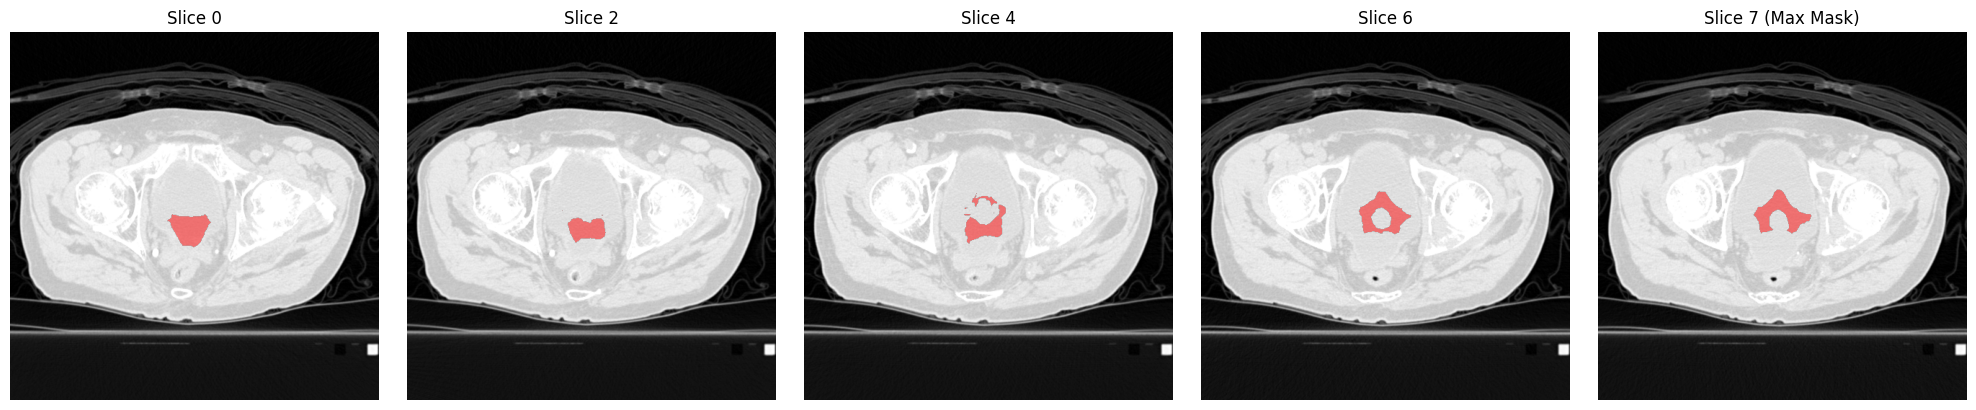

In [21]:
# Function to load and display a random NPZ file
def display_random_npz_file():
    if len(npz_files) == 0:
        print("No NPZ files found.")
        return
    
    # Choose a random file
    random_file = random.choice(npz_files)
    print(f"Selected file: {os.path.basename(random_file)}")
    
    # Load the data
    data = np.load(random_file)
    
    # Determine the keys for image and mask
    image_key = None
    mask_key = None
    
    # Check for common key names
    for key in ['image', 'img', 'images', 'imgs']:
        if key in data:
            image_key = key
            break
    
    for key in ['mask', 'masks', 'gt', 'gts', 'label', 'labels', 'gt_mask']:
        if key in data:
            mask_key = key
            break
    
    # Display the keys found
    print(f"Keys in file: {list(data.keys())}")
    print(f"Using image key: {image_key}, mask key: {mask_key}")
    
    # Get the data
    image = data[image_key] if image_key else None
    mask = data[mask_key] if mask_key else None
    
    # Display information about the data
    if image is not None:
        print(f"Image: shape={image.shape}, dtype={image.dtype}, range=[{image.min():.2f}, {image.max():.2f}]")
    if mask is not None:
        print(f"Mask: shape={mask.shape}, dtype={mask.dtype}, unique values={np.unique(mask)}")
    
    # Check if mask has any positive values
    if mask is not None and np.any(mask > 0):
        slice_with_mask = np.argmax(np.sum(mask > 0, axis=(1, 2)))
        print(f"Slice with most mask area: {slice_with_mask}")
    else:
        slice_with_mask = None
        if mask is not None:
            print("No positive values found in mask.")
    
    # Visualize the volume and mask
    if image is not None:
        # If there's a specific slice with mask, include it
        if slice_with_mask is not None:
            # Make sure the selected slice is included
            indices = [0, slice_with_mask, image.shape[0]-1]  # First, middle with mask, and last slice
            indices = sorted(list(set(indices)))  # Remove duplicates and sort
            
            # If there are less than 5 indices, add more
            if len(indices) < 5:
                additional = 5 - len(indices)
                step = image.shape[0] // (additional + 1)
                extra_indices = [step * i for i in range(1, additional + 1)]
                all_indices = sorted(list(set(indices + extra_indices)))
                
                # Now select evenly spaced indices from this set, but always include slice_with_mask
                if len(all_indices) > 5:
                    selected = [all_indices[0]]  # Always include the first slice
                    if slice_with_mask not in selected:
                        selected.append(slice_with_mask)
                        
                    # Add evenly spaced slices
                    step = (all_indices[-1] - all_indices[0]) // 3
                    for i in range(1, 4):
                        selected.append(all_indices[0] + i * step)
                    
                    # Ensure the last slice is included
                    if all_indices[-1] not in selected:
                        selected[-1] = all_indices[-1]
                        
                    # Sort and remove duplicates
                    selected = sorted(list(set(selected)))
                else:
                    selected = all_indices
            else:
                selected = indices[:5]  # Limit to 5 slices
                
            # Create a custom slice selection function
            def custom_visualize(volume, mask, selected_slices):
                num_slices = len(selected_slices)
                fig, axes = plt.subplots(1, num_slices, figsize=(4 * num_slices, 4))
                if num_slices == 1:
                    axes = [axes]  # Make iterable for consistent indexing
                
                # Normalize the image volume for display
                vmin = np.percentile(volume, 1)
                vmax = np.percentile(volume, 99)
                
                for i, idx in enumerate(selected_slices):
                    # Display the original image
                    axes[i].imshow(volume[idx], cmap='gray', vmin=vmin, vmax=vmax)
                    
                    # Overlay the mask if provided
                    if mask is not None:
                        mask_rgb = np.zeros((*mask[idx].shape, 4))
                        mask_rgb[mask[idx] > 0] = [1, 0, 0, 0.5]  # Red with alpha=0.5
                        axes[i].imshow(mask_rgb)
                    
                    title = f"Slice {idx}"
                    if idx == slice_with_mask:
                        title += " (Max Mask)"
                    axes[i].set_title(title)
                    axes[i].axis('off')
                
                plt.tight_layout()
                plt.show()
            
            custom_visualize(image, mask, selected)
        else:
            # Standard visualization with 5 slices
            visualize_volume_slices(image, mask, num_slices=5)
    else:
        print("No image data to visualize.")
    
    return data

# Display a random NPZ file
random_data = display_random_npz_file()

## 4. Display Multiple Examples


Examining file: 10543_06-07-2009-SpineSPINEBONESBRT Adult-65084_4.000000-SKINTOSKINSIM0.5MM10543a iMAR-95817_300.000000-Spine Segmentation-35728_216.npz
Keys in file: ['imgs', 'gts']
Using image key: imgs, mask key: gts
Image: shape=(8, 512, 512), dtype=uint8, range=[55.00, 255.00]
Mask: shape=(8, 512, 512), dtype=uint8, unique values=[0 1]
Slice with most mask area: 0


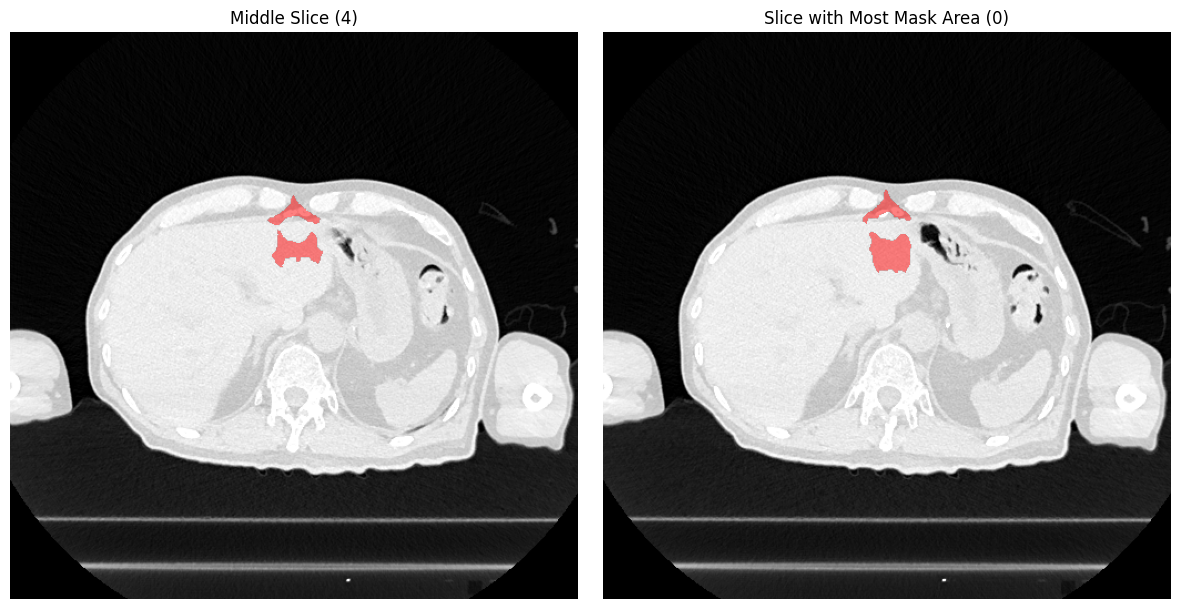


Examining file: 13641_05-15-2008-39885_4.000000-SKINTOSKINSIM.5mm13641 iMAR-17118_300.000000-Spine Segmentation-36677_564.npz
Keys in file: ['imgs', 'gts']
Using image key: imgs, mask key: gts
Image: shape=(8, 512, 512), dtype=uint8, range=[55.00, 255.00]
Mask: shape=(8, 512, 512), dtype=uint8, unique values=[0 1]
Slice with most mask area: 7


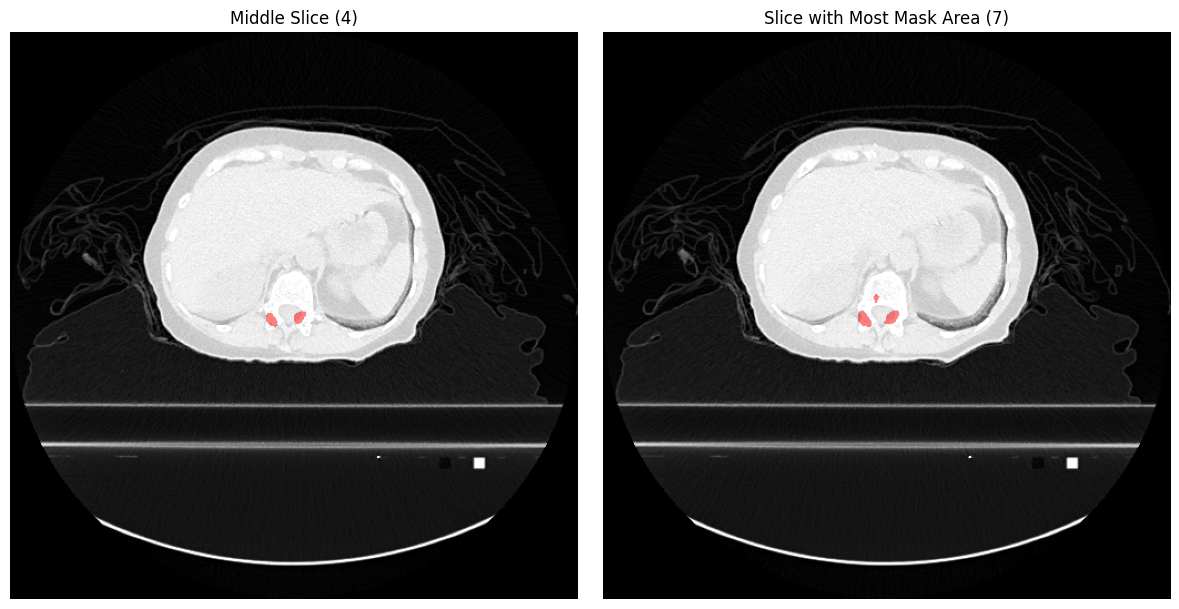


Examining file: 14151_11-28-2008-SpineSPINEBONESBRT Adult-70605_6.000000-SIMSKINTOSKIN0.5mm14151 iMAR-65105_300.000000-Spine Segmentation-02802_236.npz
Keys in file: ['imgs', 'gts']
Using image key: imgs, mask key: gts
Image: shape=(8, 512, 512), dtype=uint8, range=[55.00, 255.00]
Mask: shape=(8, 512, 512), dtype=uint8, unique values=[0 1]
Slice with most mask area: 7


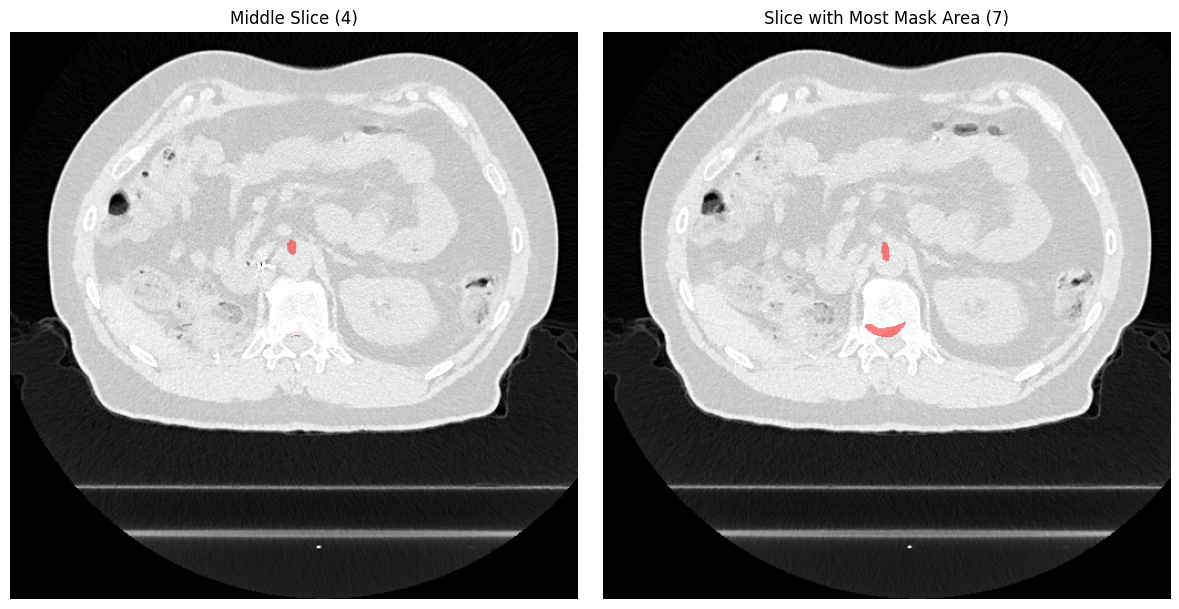

In [8]:
# Display multiple examples to get a better understanding of the dataset
def display_multiple_examples(num_examples=3):
    if len(npz_files) == 0:
        print("No NPZ files found.")
        return
    
    # Select a random sample of files
    sample_files = random.sample(npz_files, min(num_examples, len(npz_files)))
    
    for file in sample_files:
        print("\n" + "=" * 50)
        print(f"Examining file: {os.path.basename(file)}")
        try:
            data = np.load(file)
            
            # Determine the keys for image and mask
            image_key = None
            mask_key = None
            
            for key in ['image', 'img', 'images', 'imgs']:
                if key in data:
                    image_key = key
                    break
            
            for key in ['mask', 'masks', 'gt', 'gts', 'label', 'labels', 'gt_mask']:
                if key in data:
                    mask_key = key
                    break
            
            print(f"Keys in file: {list(data.keys())}")
            print(f"Using image key: {image_key}, mask key: {mask_key}")
            
            # Get the data
            image = data[image_key] if image_key else None
            mask = data[mask_key] if mask_key else None
            
            if image is not None:
                print(f"Image: shape={image.shape}, dtype={image.dtype}, range=[{image.min():.2f}, {image.max():.2f}]")
            if mask is not None:
                print(f"Mask: shape={mask.shape}, dtype={mask.dtype}, unique values={np.unique(mask)}")
                if np.any(mask > 0):
                    slice_with_mask = np.argmax(np.sum(mask > 0, axis=(1, 2)))
                    print(f"Slice with most mask area: {slice_with_mask}")
                else:
                    print("No positive values found in mask.")
            
            # Display the middle slice of the volume
            if image is not None:
                middle_idx = image.shape[0] // 2
                
                # If there's a mask, find the slice with the most mask area
                if mask is not None and np.any(mask > 0):
                    slice_areas = [np.sum(mask[i]) for i in range(mask.shape[0])]
                    max_slice_idx = np.argmax(slice_areas)
                    
                    # Show both the middle slice and the slice with the most mask area
                    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
                    
                    # Normalize for better visualization
                    vmin = np.percentile(image, 1)
                    vmax = np.percentile(image, 99)
                    
                    # Middle slice
                    axes[0].imshow(image[middle_idx], cmap='gray', vmin=vmin, vmax=vmax)
                    if middle_idx < mask.shape[0]:
                        mask_rgb = np.zeros((*mask[middle_idx].shape, 4))
                        mask_rgb[mask[middle_idx] > 0] = [1, 0, 0, 0.5]  # Red with alpha=0.5
                        axes[0].imshow(mask_rgb)
                    axes[0].set_title(f"Middle Slice ({middle_idx})")
                    axes[0].axis('off')
                    
                    # Slice with most mask area
                    axes[1].imshow(image[max_slice_idx], cmap='gray', vmin=vmin, vmax=vmax)
                    mask_rgb = np.zeros((*mask[max_slice_idx].shape, 4))
                    mask_rgb[mask[max_slice_idx] > 0] = [1, 0, 0, 0.5]  # Red with alpha=0.5
                    axes[1].imshow(mask_rgb)
                    axes[1].set_title(f"Slice with Most Mask Area ({max_slice_idx})")
                    axes[1].axis('off')
                    
                    plt.tight_layout()
                    plt.show()
                else:
                    # Just show the middle slice if there's no mask
                    plt.figure(figsize=(6, 6))
                    plt.imshow(image[middle_idx], cmap='gray')
                    plt.title(f"Middle Slice ({middle_idx})")
                    plt.axis('off')
                    plt.tight_layout()
                    plt.show()
            else:
                print("No image data to visualize.")
                
        except Exception as e:
            print(f"Error processing file {file}: {str(e)}")
        
        print("=" * 50)

# Display multiple examples
display_multiple_examples(num_examples=3)

## 5. Analyze Dataset Statistics

In [6]:
# Analyze dataset statistics (size, mask distribution, etc.)
def analyze_dataset_statistics(max_files=50):
    if len(npz_files) == 0:
        print("No NPZ files found.")
        return
    
    # Limit the number of files to analyze if there are too many
    files_to_analyze = npz_files[:min(max_files, len(npz_files))]
    print(f"Analyzing statistics for {len(files_to_analyze)} files...")
    
    # Collect statistics
    stats = {
        "volume_shapes": [],
        "mask_shapes": [],
        "volume_sizes": [],
        "volume_intensities": [],
        "mask_ratios": [],  # Ratio of positive mask voxels to total volume size
        "slices_with_masks": []  # Number of slices with masks in each volume
    }
    
    # Process each file
    for file in files_to_analyze:
        try:
            data = np.load(file)
            
            # Determine the keys for image and mask
            image_key = None
            mask_key = None
            
            for key in ['image', 'img', 'images', 'imgs']:
                if key in data:
                    image_key = key
                    break
            
            for key in ['mask', 'masks', 'gt', 'gts', 'label', 'labels', 'gt_mask']:
                if key in data:
                    mask_key = key
                    break
            
            # Get the data
            image = data[image_key] if image_key else None
            mask = data[mask_key] if mask_key else None
            
            if image is not None:
                stats["volume_shapes"].append(image.shape)
                stats["volume_sizes"].append(np.prod(image.shape))
                stats["volume_intensities"].append((image.min(), image.mean(), image.max()))
            
            if mask is not None:
                stats["mask_shapes"].append(mask.shape)
                if image is not None:
                    mask_ratio = np.sum(mask > 0) / np.prod(mask.shape)
                    stats["mask_ratios"].append(mask_ratio)
                
                # Count slices with masks
                slices_with_mask = np.sum([np.any(mask[i] > 0) for i in range(mask.shape[0])])
                stats["slices_with_masks"].append(slices_with_mask)
        
        except Exception as e:
            print(f"Error processing file {os.path.basename(file)}: {str(e)}")
    
    # Analyze the collected statistics
    print("\nDataset Statistics:")
    
    # Volume shapes
    if stats["volume_shapes"]:
        print("\nVolume Shapes:")
        unique_shapes = set([str(shape) for shape in stats["volume_shapes"]])
        shape_counts = {shape: stats["volume_shapes"].count(eval(shape)) for shape in unique_shapes}
        for shape, count in sorted(shape_counts.items(), key=lambda x: -x[1]):
            print(f"  - {shape}: {count} volumes ({count/len(stats['volume_shapes'])*100:.1f}%)")
    
    # Mask shapes
    if stats["mask_shapes"]:
        print("\nMask Shapes:")
        unique_shapes = set([str(shape) for shape in stats["mask_shapes"]])
        shape_counts = {shape: stats["mask_shapes"].count(eval(shape)) for shape in unique_shapes}
        for shape, count in sorted(shape_counts.items(), key=lambda x: -x[1]):
            print(f"  - {shape}: {count} masks ({count/len(stats['mask_shapes'])*100:.1f}%)")
    
    # Volume intensities
    if stats["volume_intensities"]:
        print("\nVolume Intensities:")
        min_vals = [v[0] for v in stats["volume_intensities"]]
        mean_vals = [v[1] for v in stats["volume_intensities"]]
        max_vals = [v[2] for v in stats["volume_intensities"]]
        print(f"  - Min intensity range: [{min(min_vals):.2f}, {max(min_vals):.2f}]")
        print(f"  - Mean intensity range: [{min(mean_vals):.2f}, {max(mean_vals):.2f}]")
        print(f"  - Max intensity range: [{min(max_vals):.2f}, {max(max_vals):.2f}]")
    
    # Mask ratios
    if stats["mask_ratios"]:
        print("\nMask Coverage:")
        mean_ratio = np.mean(stats["mask_ratios"]) * 100
        median_ratio = np.median(stats["mask_ratios"]) * 100
        min_ratio = min(stats["mask_ratios"]) * 100
        max_ratio = max(stats["mask_ratios"]) * 100
        print(f"  - Average mask coverage: {mean_ratio:.4f}% of volume")
        print(f"  - Median mask coverage: {median_ratio:.4f}% of volume")
        print(f"  - Range: [{min_ratio:.4f}%, {max_ratio:.4f}%]")
    
    # Slices with masks
    if stats["slices_with_masks"]:
        print("\nSlices with Masks:")
        mean_slices = np.mean(stats["slices_with_masks"])
        median_slices = np.median(stats["slices_with_masks"])
        min_slices = min(stats["slices_with_masks"])
        max_slices = max(stats["slices_with_masks"])
        print(f"  - Average number of slices with masks: {mean_slices:.2f}")
        print(f"  - Median number of slices with masks: {median_slices:.2f}")
        print(f"  - Range: [{min_slices}, {max_slices}]")
        
        # Calculate the average percentage of slices with masks
        if stats["volume_shapes"]:
            slice_percentages = [slices / shape[0] * 100 for slices, shape 
                              in zip(stats["slices_with_masks"], stats["volume_shapes"])]
            mean_percentage = np.mean(slice_percentages)
            median_percentage = np.median(slice_percentages)
            print(f"  - Average percentage of slices with masks: {mean_percentage:.2f}%")
            print(f"  - Median percentage of slices with masks: {median_percentage:.2f}%")
    
    return stats

# Analyze dataset statistics
stats = analyze_dataset_statistics(max_files=50)

Analyzing statistics for 50 files...

Dataset Statistics:

Volume Shapes:
  - (8, 512, 512): 50 volumes (100.0%)

Mask Shapes:
  - (8, 512, 512): 50 masks (100.0%)

Volume Intensities:
  - Min intensity range: [0.00, 55.00]
  - Mean intensity range: [65.00, 219.46]
  - Max intensity range: [255.00, 255.00]

Mask Coverage:
  - Average mask coverage: 0.6017% of volume
  - Median mask coverage: 0.3535% of volume
  - Range: [0.0042%, 6.6231%]

Slices with Masks:
  - Average number of slices with masks: 7.96
  - Median number of slices with masks: 8.00
  - Range: [6, 8]
  - Average percentage of slices with masks: 99.50%
  - Median percentage of slices with masks: 100.00%


## 6. Interactive Image Browser

In [ ]:
# Create an interactive browser for the dataset
from ipywidgets import interact, interactive, fixed, widgets

def interactive_dataset_browser(file_list, max_files=20):
    if len(file_list) == 0:
        print("No files to browse.")
        return
    
    # Limit the number of files to avoid performance issues
    limited_files = file_list[:min(max_files, len(file_list))]
    filenames = [os.path.basename(f) for f in limited_files]
    
    # Store loaded volumes to avoid reloading
    loaded_volumes = {}
    
    def load_volume(file_index):
        """Load volume and mask from NPZ file"""
        if file_index in loaded_volumes:
            return loaded_volumes[file_index]
        
        file_path = limited_files[file_index]
        try:
            data = np.load(file_path)
            
            # Determine keys
            image_key = None
            mask_key = None
            
            for key in ['image', 'img', 'images', 'imgs']:
                if key in data:
                    image_key = key
                    break
            
            for key in ['mask', 'masks', 'gt', 'label', 'labels', 'gt_mask']:
                if key in data:
                    mask_key = key
                    break
            
            # Get the data
            image = data[image_key] if image_key else None
            mask = data[mask_key] if mask_key else None
            
            loaded_volumes[file_index] = (image, mask)
            return image, mask
        except Exception as e:
            print(f"Error loading file {file_path}: {str(e)}")
            return None, None
    
    def view_slice(file_index, slice_index, mask_alpha=0.5, mask_color='red'):
        """Display a slice from the selected volume"""
        image, mask = load_volume(file_index)
        
        if image is None:
            print("Failed to load image data.")
            return
        
        # Make sure slice_index is within bounds
        if slice_index >= image.shape[0]:
            slice_index = image.shape[0] - 1
        
        # Create figure
        plt.figure(figsize=(10, 8))
        
        # Display the image slice
        vmin = np.percentile(image, 1)
        vmax = np.percentile(image, 99)
        plt.imshow(image[slice_index], cmap='gray', vmin=vmin, vmax=vmax)
        
        # Overlay the mask if available
        if mask is not None and slice_index < mask.shape[0]:
            mask_rgb = np.zeros((*mask[slice_index].shape, 4))
            
            if mask_color == 'red':
                mask_rgb[mask[slice_index] > 0] = [1, 0, 0, mask_alpha]
            elif mask_color == 'green':
                mask_rgb[mask[slice_index] > 0] = [0, 1, 0, mask_alpha]
            elif mask_color == 'blue':
                mask_rgb[mask[slice_index] > 0] = [0, 0, 1, mask_alpha]
            elif mask_color == 'yellow':
                mask_rgb[mask[slice_index] > 0] = [1, 1, 0, mask_alpha]
            
            plt.imshow(mask_rgb)
        
        plt.title(f"File: {filenames[file_index]}\nSlice: {slice_index}/{image.shape[0]-1}")
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    
    # Create interactive viewer
    file_dropdown = widgets.Dropdown(
        options=[(f, i) for i, f in enumerate(filenames)],
        description='File:',
        style={'description_width': 'initial'}
    )
    
    # Initial volume to get max slice
    initial_image, _ = load_volume(0)
    max_slice = initial_image.shape[0] - 1 if initial_image is not None else 10
    
    slice_slider = widgets.IntSlider(
        min=0,
        max=max_slice,
        step=1,
        value=max_slice//2,
        description='Slice:',
        continuous_update=False
    )
    
    alpha_slider = widgets.FloatSlider(
        min=0.0,
        max=1.0,
        step=0.05,
        value=0.5,
        description='Mask Opacity:',
        continuous_update=False
    )
    
    color_dropdown = widgets.Dropdown(
        options=['red', 'green', 'blue', 'yellow'],
        value='red',
        description='Mask Color:',
        style={'description_width': 'initial'}
    )
    
    # Update slice slider max when file changes
    def update_slice_max(change):
        if change['type'] == 'change' and change['name'] == 'value':
            file_index = change['new']
            image, _ = load_volume(file_index)
            if image is not None:
                slice_slider.max = image.shape[0] - 1
                slice_slider.value = min(slice_slider.value, slice_slider.max)
    
    file_dropdown.observe(update_slice_max, names='value')
    
    # Create the interactive widget
    interact(
        view_slice,
        file_index=file_dropdown,
        slice_index=slice_slider,
        mask_alpha=alpha_slider,
        mask_color=color_dropdown
    )

# Run the interactive browser
if len(npz_files) > 0:
    interactive_dataset_browser(npz_files)
else:
    print("No NPZ files found to browse.")

## 7. Summary and Observations

### Dataset Summary

Based on the exploration above, here's a summary of the SpineMetsCT dataset:

1. **Data Format:** 3D CT volumes stored as NPZ files with corresponding segmentation masks
2. **Structure:** The data is split into train/val/test sets
3. **Characteristics:**
   - CT scans of the spine with metastatic lesions
   - Masks identify the lesion areas
   - Relatively sparse segmentation (small percentage of voxels are masked)
   - Lesions typically span multiple slices

### Key Observations

- The masks highlight the metastatic lesions in the spine, which appear as small regions
- The contrast between lesions and surrounding tissue can be subtle, making segmentation challenging
- Many slices in each volume contain no lesions
- The dataset appears to be properly preprocessed and ready for training segmentation models

### Next Steps

For model training and evaluation:
1. Use appropriate data augmentation techniques for medical imaging
2. Consider class imbalance strategies (weighted loss, focal loss) due to sparse masks
3. Evaluate models using metrics like Dice and IoU that are suitable for sparse segmentation
4. Potentially use 3D context (multiple slices) for better segmentation results